In [1]:
import acoular
from os import path
import matplotlib.pyplot as plt

# define data and params
freq_band = 8000
ts = acoular.MaskedTimeSamples( name="/media/xian/Data/dataset/Bekaert/h5files/45.h5", invalid_channels=[9] )
ps = acoular.PowerSpectra( time_data=ts, block_size=1024, window="Hanning" )
micgeofile = "array_9.xml"

# instantiate acoular components
mg = acoular.MicGeom( from_file=micgeofile )
rg = acoular.RectGrid( x_min=-0.2, x_max=4,
                       y_min=-0.2, y_max=4,
                       z=0.5, increment=0.01 )
# steering vector set to true location and gives the reference point of the array, otherwise planar wave assumed
#st = acoular.SteeringVector( grid=rg, mics=mg, steer_type='true location', ref=[1.88,1.87,1.68] )
st = acoular.SteeringVector( grid=rg, mics=mg, ref=[1.88,1.87,1.68] )

# basic freq domain beamformer

[('45_cache.h5', 1)]
[('45_cache.h5', 2)]


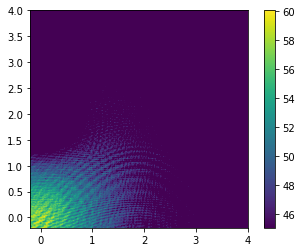

In [2]:
%matplotlib inline
bb = acoular.BeamformerBase( freq_data=ps, steer=st )
Lm = acoular.L_p( bb.synthetic(freq_band,3) )
plt.figure()
plt.imshow( Lm.T, origin="lower", vmin=Lm.max()-15, extent=rg.extend() )
plt.colorbar();

# freq domain beamformer with diagonal being removed from the CSM

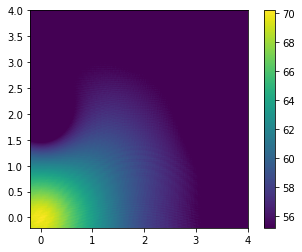

In [3]:
bb.r_diag = False
Lm = acoular.L_p( bb.synthetic(freq_band,3) )
plt.figure()
plt.imshow( Lm.T, origin="lower", vmin=Lm.max()-15, extent=rg.extend() )
plt.colorbar();

# Functional Beamforming

[('45_cache.h5', 3)]


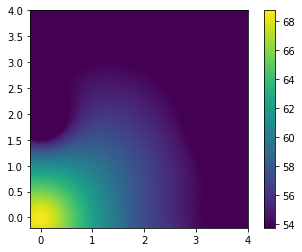

In [4]:
bf = acoular.BeamformerFunctional( freq_data=ps, steer=st, gamma=50  )
Lm = acoular.L_p( bf.synthetic(freq_band,3) )
plt.figure()
plt.imshow( Lm.T, origin="lower", vmin=Lm.max()-15, extent=rg.extend() )
plt.colorbar();

# MUSIC Beamformer

[('44_cache.h5', 8)]


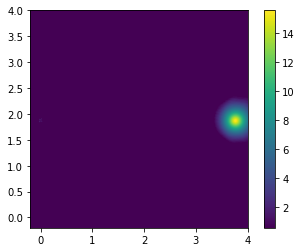

In [18]:
bm = acoular.BeamformerMusic( freq_data=ps, steer=st )
Lm = acoular.L_p( bm.synthetic(freq_band,3) )
plt.figure()
plt.imshow( Lm.T, origin="lower", vmin=Lm.max()-15, extent=rg.extend() )
plt.colorbar();

# Beamformer Eig Debug

[('44_cache.h5', 7)]


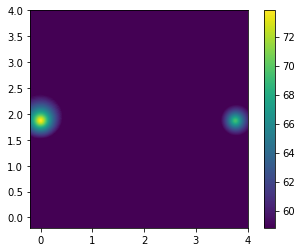

In [17]:
be = acoular.BeamformerCapon( freq_data=ps, steer=st )
Lm = acoular.L_p( be.synthetic(freq_band,3) )
plt.figure()
plt.imshow( Lm.T, origin="lower", vmin=Lm.max()-15, extent=rg.extend() )
plt.colorbar();

# CleanSC deconvolution

In [41]:
# bs = acoular.BeamformerCleansc( freq_data=ps, steer=st )
# Lm = acoular.L_p( bs.synthetic( 8000, 3) )
# plt.figure()
# plt.imshow( Lm.T, origin="lower", vmin=Lm.max()-15, extent=rg.extend() )
# plt.colorbar();